In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # feature extraction
from keras.layers import Flatten, Dense, Dropout # classification
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator # data augmentation

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

2025-07-16 16:01:22.997806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#cifar10 veri setini yükleme
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

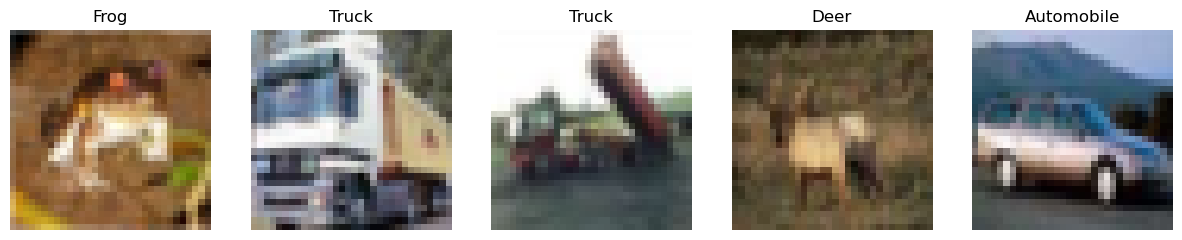

In [3]:
#verileri görselleştirme
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
fig, axes = plt.subplots(1, 5, figsize=(15,10))

for i in range(5):
    axes[i].imshow(x_train[i])
    label = class_labels[int(y_train[i])]
    axes[i].set_title(label)
    axes[i].axis("off")
plt.show()

In [4]:
#veri setini normalize edelim 
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [5]:
#one-hot encoding 
y_train = to_categorical(y_train, 10) # 10 class var, bu nedenle 10 yazıyoruz
y_test = to_categorical(y_test, 10)

In [6]:
#veri artırımı - data augmentation
datagen = ImageDataGenerator(
    rotation_range= 20, # 20 dereceye kadar döndürme sağlar
    width_shift_range= 0.2, # görüntüyü yatayda %20 kaydırma
    height_shift_range= 0.2, # görüntüyü dikeyde %20 kaydırma
    shear_range= 0.2, # görüntü üzerinde kaydrıma
    zoom_range= 0.2, # görüntüye zoom uygulama
    horizontal_flip= True, #görüntüyü yatayda ters çevirme - simetrik alma
    fill_mode= "nearest" # boş alanları doldurmak için en yakın pixel değerini al
)

datagen.fit(x_train) #data augmentation'ı eğitim verileri üzerinde uygula

In [ ]:
#creat, compile and train model
#cnn modelini oluşturma (base model)
model = Sequential()

#feature extraction: CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation= "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #bağlantıların %25'ini rastgele olarak kapat 

#feature extraction: CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(Conv2D(64, (3,3), activation= "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#classification: FLATTEN, DENSE, RELU, DROPOUT, DENSE (OUTPUT LAYER)
model.add(Flatten()) #vektör oluştur
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation= "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

2025-07-16 16:01:27.309067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#model derleme
model.compile(optimizer = RMSprop(learning_rate = 0.0001, decay = 1e-6),
                                  loss = "categorical_crossentropy",
                                    metrics= ["accuracy"])

In [9]:
#model training
history = model.fit(datagen.flow(x_train, y_train, batch_size= 64), #data augmentation uygulanmış veri akışı
          epochs=100,
          validation_data= (x_test, y_test) #doğrulama seti
          )

Epoch 1/100
782/782 [==============================] - 53s 66ms/step - loss: 2.1372 - accuracy: 0.1879 - val_loss: 1.9677 - val_accuracy: 0.2689
Epoch 2/100
782/782 [==============================] - 52s 67ms/step - loss: 1.9466 - accuracy: 0.2652 - val_loss: 1.8186 - val_accuracy: 0.3382
Epoch 3/100
782/782 [==============================] - 52s 66ms/step - loss: 1.8335 - accuracy: 0.3157 - val_loss: 1.6372 - val_accuracy: 0.3946
Epoch 4/100
782/782 [==============================] - 52s 67ms/step - loss: 1.7609 - accuracy: 0.3466 - val_loss: 1.5948 - val_accuracy: 0.4093
Epoch 5/100
782/782 [==============================] - 52s 67ms/step - loss: 1.7151 - accuracy: 0.3648 - val_loss: 1.5092 - val_accuracy: 0.4511
Epoch 6/100
782/782 [==============================] - 52s 67ms/step - loss: 1.6635 - accuracy: 0.3860 - val_loss: 1.5157 - val_accuracy: 0.4390
Epoch 7/100
782/782 [==============================] - 52s 67ms/step - loss: 1.6190 - accuracy: 0.4056 - val_loss: 1.4742 - val_ac

In [10]:
#test model and evaluate performance
#modelin test seti üzerinden tahminini yap
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1) #tahmin edilen sınıfları al
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 5s 15ms/step


In [11]:
#classification report hesapla
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

    Airplane       0.85      0.76      0.80      1000
  Automobile       0.88      0.91      0.89      1000
        Bird       0.83      0.51      0.63      1000
         Cat       0.67      0.49      0.57      1000
        Deer       0.73      0.70      0.72      1000
         Dog       0.75      0.65      0.70      1000
        Frog       0.53      0.96      0.68      1000
       Horse       0.85      0.79      0.82      1000
        Ship       0.91      0.84      0.87      1000
       Truck       0.77      0.94      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.75     10000
weighted avg       0.78      0.76      0.75     10000



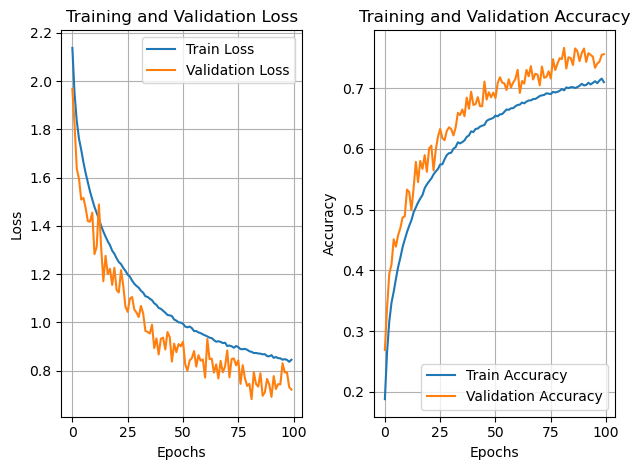

In [12]:
plt.figure()

#loss grafikleri
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

#accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
from keras.models import load_model #modelin geri yüklenmesi 
model.save("final_cifar10_cnn_model.h5")
loaded_model = load_model("final_cifar10_cnn_model.h5")
#kaydedilmiş model sonuçlarını gösterme
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Loaded Model Result -> Test Acc: {test_acc}, Test Loss : {test_loss}")

313/313 [==============================] - 5s 16ms/step - loss: 0.7219 - accuracy: 0.7559
Loaded Model Result -> Test Acc: 0.7559000253677368, Test Loss : 0.7218737602233887


1/1 [==============================] - 0s 25ms/step


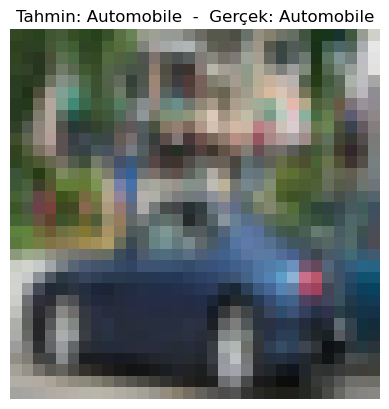

In [ ]:
img = x_test[122]
true_label = np.argmax(y_test[122])

img_input = np.expand_dims(img, axis=0) 

prediction = loaded_model.predict(img_input)
predicted_class_index = np.argmax(prediction)

plt.imshow(img)
plt.axis('off')
plt.title(f"Tahmin: {class_labels[predicted_class_index]}  -  Gerçek: {class_labels[true_label]}")
plt.show()
